In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/merged.csv')
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [9]:
df.tail()

,userId,movieId,rating
102557,629,50,5.000000
102558,629,1,5.000000
102559,629,78499,5.000000
102560,629,60069,5.000000
102561,629,166024,1.666667


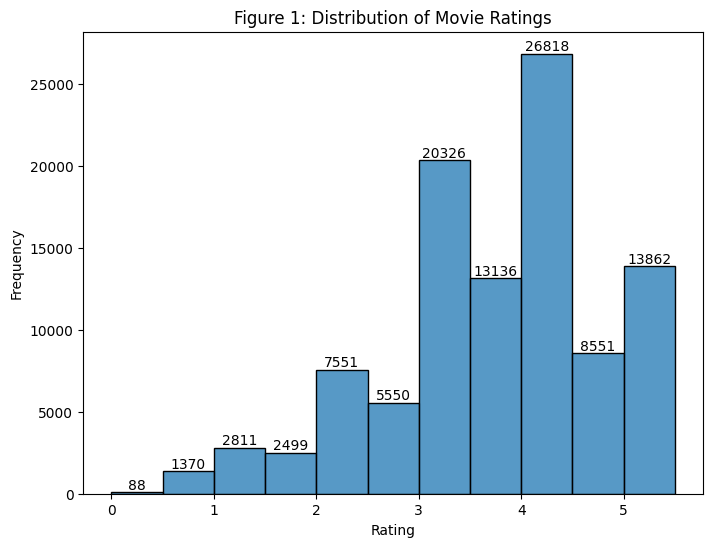

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['rating'], bins=np.arange(0,6,.5))

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Figure 1: Distribution of Movie Ratings')
plt.show()


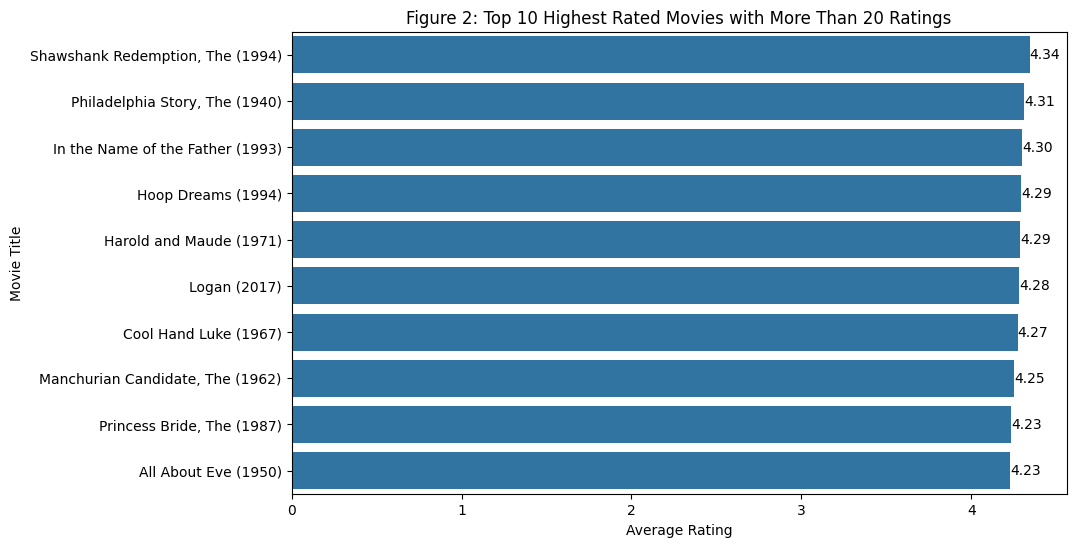

In [ ]:
df = pd.read_csv('data/merged.csv')
movies_df = pd.read_csv('data/ml-latest-small/movies.csv')

movie_stats = df.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()

movie_stats = movie_stats.merge(movies_df[['movieId', 'title']], on='movieId', how='left')

top_rated_movies = movie_stats[movie_stats['count'] > 20].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies['mean'], y=top_rated_movies['title'], orient='h')

for index, value in enumerate(top_rated_movies['mean']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Figure 2: Top 10 Highest Rated Movies with More Than 20 Ratings')
plt.show()


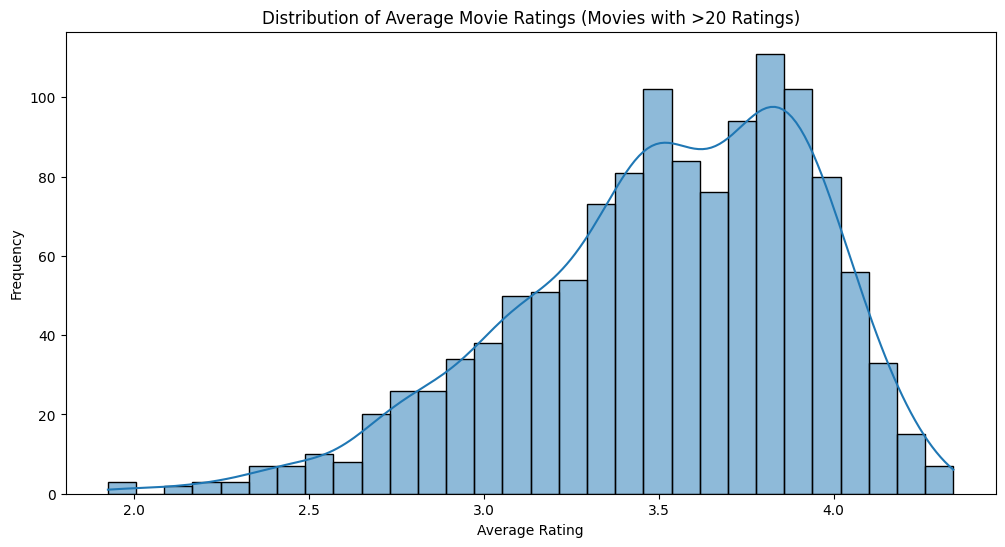

In [ ]:
movie_avg_ratings = df.groupby('movieId')['rating'].mean()
movie_rating_counts = df['movieId'].value_counts()
filtered_movies = movie_avg_ratings[movie_rating_counts > 20]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_movies, kde=True, bins=30)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Movie Ratings (Movies with >20 Ratings)')
plt.show()
